# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

(250, 2) (250,)


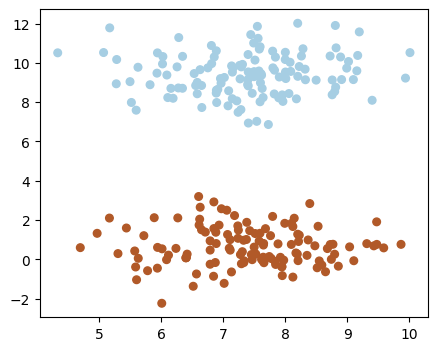

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples = 250 , n_features = 2 ,centers = 2 , random_state = 8)
print(X.shape, y.shape)

_, ax = plt.subplots(figsize =(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , s = 30, cmap = 'Paired')
# s , es el tamaño d elos puntos

plt.show()

In [ ]:
clf = SVC(kernel = "linear", C = 1 )
clf.fit( X, y)

SVC(C=1, kernel='linear')

In [ ]:
h_min, h_max = X[:,0] .min()-0.5, X[:,0] .max()+0.5
v_min, v_max = X[:,1] .min()-0.5, X[:,1] .max()+0.5

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace(h_min , h_max , 30), np.linspace( v_min , v_max , 30))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(),v_grid.ravel()] )
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape )
print (pred_grid.shape)

(900,)
(30, 30)


3


[]

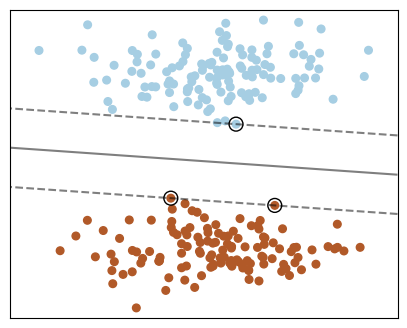

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , s = 30, cmap = 'Paired')

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
## fronteras de las clases
#alpha transparencia

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#facecolors - color de fondo en este caso transparente
print(len(clf.support_vectors_)) #Cantidad de los vectores de soporte

# ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
# ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

([], [])

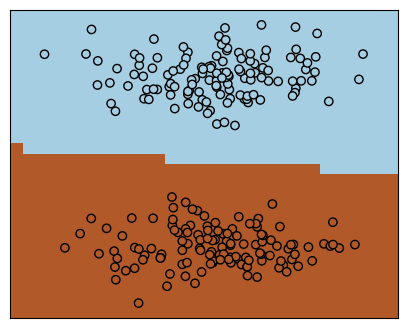

In [ ]:
pred_grid = clf.predict( np.c_[h_grid.ravel(),v_grid.ravel()] )
pred_grid = pred_grid.reshape( h_grid.shape )

_, ax = plt.subplots(figsize=(5,4))

ax.pcolormesh(h_grid,v_grid, pred_grid, cmap = "Paired")
ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='Paired')

ax.set_xticks([]), ax.set_yticks([])

## In real data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [ ]:
# import some data to play with
iris = load_iris()
X = iris.data[:,0:2]   # Pick 2 features
Y = iris.target

In [ ]:
# Create an instance of SVM and fit the data.
clf = SVC(kernel='linear', C = 1)
clf.fit( X , Y )

SVC(C=1, kernel='linear')

In [ ]:
#Plot decision boundaries
def desBound(horiz,vert, etiquetas, ptos, InstP, base, altura):
  ##Horiz : Matriz con los datos del eje horizontal ej: iris_x[:,0]
  ##Vert  : Matriz con los datos del eje vertical ej: iris_x[:,1]
  #etiquetas : Array con las etiquetas de los datos ej: iris_y
  ##ptos  : cantidad de puntos equidistantes para el mesh
  ##InstP : Nombre de la instacia de la predicción
  ##base  : ancho de la gráfica
  ##altura: alto de la gráfica

  #1. Determine min-max values in each axis
  h_min, h_max = horiz.min()-0.1 , horiz.max()+0.1
  v_min, v_max = vert.min()-0.1 , vert.max()+0.1

  h_grid, v_grid = np.meshgrid(np.linspace(h_min,h_max,ptos), np.linspace(v_min,v_max,ptos))

  #3 Compute predictions
  pred_grid = InstP.predict(np.c_[h_grid.ravel(),v_grid.ravel()])

  #4 Reshape predictions to grid
  pred_grid = pred_grid.reshape(h_grid.shape)


  _, ax=plt.subplots(figsize=(base,altura))
  ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = "Paired")

  # Scatter real values
  ax.scatter ( horiz , vert , c = etiquetas , edgecolors = 'k', cmap = "Paired")

  ax.set_xticks(())
  ax.set_yticks(())
#desBound(iris_x[:,0],iris_x[:,1],iris_y,200,naive_bayes,5,4)

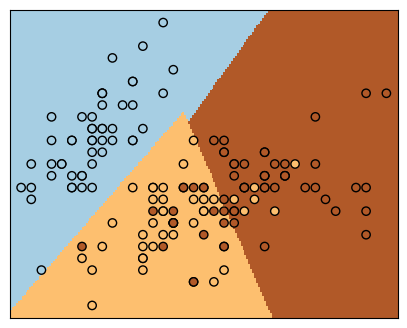

In [ ]:
# Plot decision boundaries

desBound(X[:,0], X[:,1], Y, 200, clf, 5, 4)